In [18]:
import pandas as pd
import numpy as np
import toml
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Pathfinder Swerve Path Visualization
This uses our Java robot code and the [Pathfinder](https://github.com/JacisNonsense/Pathfinder) library to output trajectory points to a `.csv` file we use to plot.

The velocity and headings for each segment is transformed into a `forward` and `strafe` input to the swerve drive.

Parameters are:

- `dt` = iteration time, loop period (ms)
- `v_max` = max velocity (ft/sec)
- `a_max` = max acceleration (ft/sec/sec)
- `j_max` = max jerk (ft/sec/sec/sec)
- `waypoints` = x, y, and exit angle (degrees) 


## Drive forward down field

In [19]:
# drive forward down field
toml_str = """
waypoints = [
  {x = 0.0, y = 0.0, angle = 0.0},
  {x = 1.0, y = 0.0, angle = 0.0},

]
fit              = "HERMITE_CUBIC"
sample_count     = 100_000
dt               = 0.05  # sec
max_velocity     = 1.7   # m/sec
max_acceleration = 2.0   # m/sec/sec
max_jerk         = 60.0  # m/sec/sec/sec
"""

In [20]:
trajectory_name = "pathfinder_swerve_1"
# import trajectory
# trajectory.build(toml_str, trajectory_name)

df = pd.read_csv("data/%s.csv" % trajectory_name)
path = toml.loads(toml_str)
wp = pd.DataFrame(path['waypoints'])

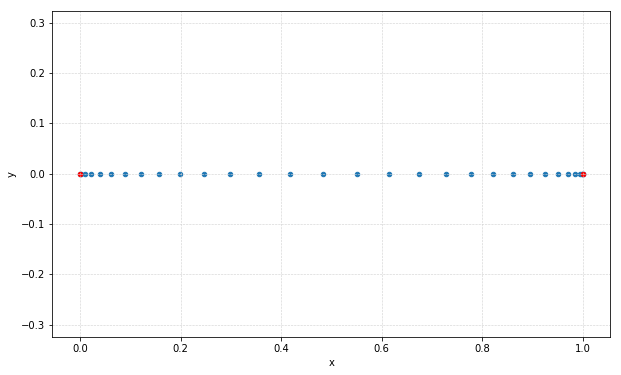

In [21]:
ax = df.plot.scatter('x', 'y', figsize = [10, 6])
wp.plot.scatter('x', 'y', c='r', ax=ax)
ax.axis('equal')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)

In [22]:
df['heading_deg'] = df['heading'].apply(math.degrees)
df['velocity_normalized'] = df['velocity'] / df['velocity'].max()
df['forward'] = df['heading'].apply(math.cos) * df['velocity_normalized']
df['strafe'] = -df['heading'].apply(math.sin) * df['velocity_normalized']
df[['heading_deg', 'velocity', 'velocity_normalized', 'forward', 'strafe']]

,heading_deg,velocity,velocity_normalized,forward,strafe
0,0.0,0.000000,0.000000,0.000000,-0.0
1,0.0,0.098663,0.071429,0.071429,-0.0
2,0.0,0.197326,0.142857,0.142857,-0.0
3,0.0,0.295989,0.214286,0.214286,-0.0
4,0.0,0.394651,0.285714,0.285714,-0.0
5,0.0,0.493314,0.357143,0.357143,-0.0
6,0.0,0.591977,0.428571,0.428571,-0.0
7,0.0,0.690640,0.500000,0.500000,-0.0
8,0.0,0.789303,0.571429,0.571429,-0.0
9,0.0,0.887966,0.642857,0.642857,-0.0


## Drive at 60 deg relative to field

In [23]:
degrees = 60.0

# drive at 60 deg relative to field
toml_str = """
waypoints = [
  {{x = 0.0, y = 0.0, angle = {0}}},
  {{x = {1}, y = {2}, angle = {0}}},

]
fit              = "HERMITE_CUBIC"
sample_count     = 100_000
dt               = 0.05  # sec
max_velocity     = 1.7   # m/sec
max_acceleration = 2.0   # m/sec/sec
max_jerk         = 60.0  # m/sec/sec/sec
""".format(degrees, math.cos(math.radians(degrees)), math.sin(math.radians(degrees)))

In [24]:
trajectory_name = "pathfinder_swerve_2"
# import trajectory
# trajectory.build(toml_str, trajectory_name)

df = pd.read_csv("data/%s.csv" % trajectory_name)
path = toml.loads(toml_str)
wp = pd.DataFrame(path['waypoints'])

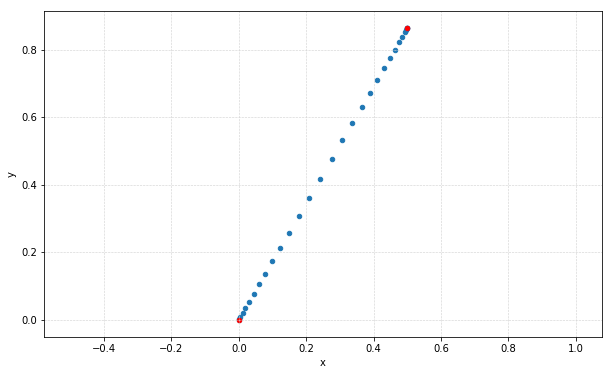

In [25]:
ax = df.plot.scatter('x', 'y', figsize = [10, 6])
wp.plot.scatter('x', 'y', c='r', ax=ax)
ax.axis('equal')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)

In [26]:
df['heading_deg'] = df['heading'].apply(math.degrees)
df['velocity_normalized'] = df['velocity'] / df['velocity'].max()
df['forward'] = df['heading'].apply(math.cos) * df['velocity_normalized']
df['strafe'] = -df['heading'].apply(math.sin) * df['velocity_normalized']
df[['heading_deg', 'velocity', 'velocity_normalized', 'forward', 'strafe']]

,heading_deg,velocity,velocity_normalized,forward,strafe
0,0.0,0.000000,0.000000,0.000000,-0.000000
1,60.0,0.098663,0.071429,0.035714,-0.061859
2,60.0,0.197326,0.142857,0.071429,-0.123718
3,60.0,0.295989,0.214286,0.107143,-0.185577
4,60.0,0.394651,0.285714,0.142857,-0.247436
5,60.0,0.493314,0.357143,0.178571,-0.309295
6,60.0,0.591977,0.428571,0.214286,-0.371154
7,60.0,0.690640,0.500000,0.250000,-0.433013
8,60.0,0.789303,0.571429,0.285714,-0.494872
9,60.0,0.887966,0.642857,0.321429,-0.556731


## Drive in a dogleg, down and across field

In [27]:
degrees = 60.0

# drive at 60 deg relative to field
toml_str = """
waypoints = [
  {x = 0.0, y = 0.0, angle = 0.0},
  {x = 1.0, y = 1.0, angle = 90.0},

]
fit              = "HERMITE_CUBIC"
sample_count     = 100_000
dt               = 0.05  # sec
max_velocity     = 1.7   # m/sec
max_acceleration = 2.0   # m/sec/sec
max_jerk         = 60.0  # m/sec/sec/sec
"""

In [28]:
trajectory_name = "pathfinder_swerve_3"
import trajectory
trajectory.build(toml_str, trajectory_name)

df = pd.read_csv("data/%s.csv" % trajectory_name)
path = toml.loads(toml_str)
wp = pd.DataFrame(path['waypoints'])

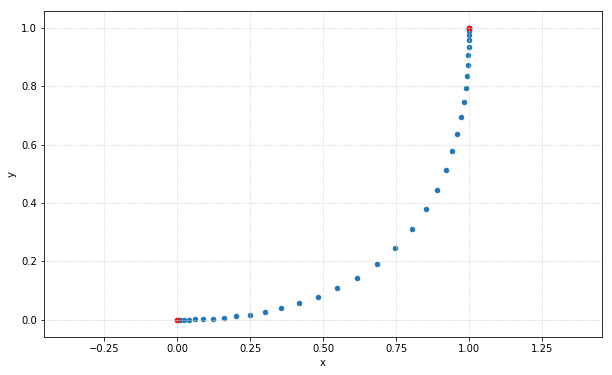

In [29]:
ax = df.plot.scatter('x', 'y', figsize = [10, 6])
wp.plot.scatter('x', 'y', c='r', ax=ax)
ax.axis('equal')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)

In [30]:
df['heading_deg'] = df['heading'].apply(math.degrees)
df['velocity_normalized'] = df['velocity'] / df['velocity'].max()
df['forward'] = df['heading'].apply(math.cos) * df['velocity_normalized']
df['strafe'] = -df['heading'].apply(math.sin) * df['velocity_normalized']
df[['heading_deg', 'velocity', 'velocity_normalized', 'forward', 'strafe']]

,heading_deg,velocity,velocity_normalized,forward,strafe
0,0.000000,0.0000,0.000000,0.000000e+00,-0.000000
1,0.071179,0.1000,0.058824,5.882348e-02,-0.000073
2,0.288060,0.2000,0.117647,1.176456e-01,-0.000591
3,0.655027,0.3000,0.176471,1.764591e-01,-0.002017
4,1.180619,0.4000,0.235294,2.352442e-01,-0.004848
5,1.877399,0.5000,0.294118,2.939598e-01,-0.009636
6,2.762603,0.6000,0.352941,3.525310e-01,-0.017011
7,3.859051,0.7000,0.411765,4.108311e-01,-0.027713
8,5.196347,0.8000,0.470588,4.686542e-01,-0.042621
9,6.812411,0.9000,0.529412,5.256740e-01,-0.062798


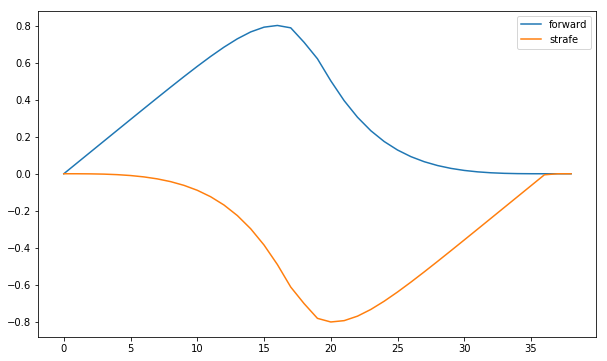

In [33]:

df.loc[:,['forward', 'strafe']].plot(figsize = [10, 6])

In [32]:
df

,dt,x,y,position,velocity,acceleration,jerk,heading,heading_deg,velocity_normalized,forward,strafe
0,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-0.000000
1,0.05,0.002480,0.000002,0.002500,0.1000,2.000000,4.000000e+01,0.001242,0.071179,0.058824,5.882348e-02,-0.000073
2,0.05,0.009980,0.000025,0.010000,0.2000,2.000000,0.000000e+00,0.005028,0.288060,0.117647,1.176456e-01,-0.000591
3,0.05,0.022480,0.000128,0.022500,0.3000,2.000000,4.440892e-15,0.011432,0.655027,0.176471,1.764591e-01,-0.002017
4,0.05,0.039977,0.000408,0.040000,0.4000,2.000000,-8.881784e-15,0.020606,1.180619,0.235294,2.352442e-01,-0.004848
5,0.05,0.062469,0.001007,0.062500,0.5000,2.000000,1.776357e-14,0.032767,1.877399,0.294118,2.939598e-01,-0.009636
6,0.05,0.089946,0.002119,0.090000,0.6000,2.000000,-1.776357e-14,0.048217,2.762603,0.352941,3.525310e-01,-0.017011
7,0.05,0.122392,0.003993,0.122500,0.7000,2.000000,0.000000e+00,0.067353,3.859051,0.411765,4.108311e-01,-0.027713
8,0.05,0.159774,0.006949,0.160000,0.8000,2.000000,0.000000e+00,0.090693,5.196347,0.470588,4.686542e-01,-0.042621
9,0.05,0.202040,0.011388,0.202500,0.9000,2.000000,4.440892e-14,0.118899,6.812411,0.529412,5.256740e-01,-0.062798
